# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import koreanize_matplotlib
import numpy as np

In [2]:
data = pd.read_csv('data3/mini.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [7]:
data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [4]:
data.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


In [5]:
data.isnull().sum()
#결측치 없음

user_id                              0
subscription_duration                0
recent_login_time                    0
average_login_time                   0
average_time_per_learning_session    0
monthly_active_learning_days         0
total_completed_courses              0
recent_learning_achievement          0
abandoned_learning_sessions          0
community_engagement_level           0
preferred_difficulty_level           0
subscription_type                    0
customer_inquiry_history             0
payment_pattern                      0
target                               0
dtype: int64

payment_patten별 target 파악

In [23]:
target_pivot_table = pd.pivot_table(data, values='user_id',   #values : 열에 들어 가는 부분
                       index=['payment_pattern'], #index : 행에 들어가는 부분
                       columns=['target'],  
                       aggfunc="count")  #aggfunc : 데이터 축약시 사용할 함수
target_pivot_table

target,0,1
payment_pattern,,
0,468,807
1,502,783
2,459,747
3,467,763
4,461,753
5,488,750
6,467,801
7,489,795


<Axes: xlabel='payment_pattern'>

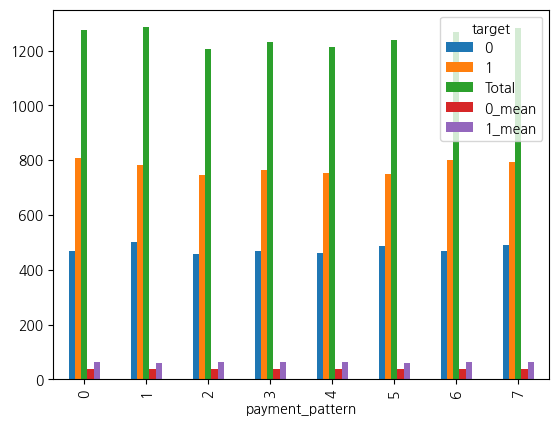

In [67]:
target_pivot_table.plot.bar()


In [24]:
# Add the 'Total' column
target_pivot_table['Total'] = target_pivot_table.sum(axis=1)
target_pivot_table

target,0,1,Total
payment_pattern,,,
0,468,807,1275
1,502,783,1285
2,459,747,1206
3,467,763,1230
4,461,753,1214
5,488,750,1238
6,467,801,1268
7,489,795,1284


In [40]:
target_pivot_table.iloc[:,0]

payment_pattern
0    468
1    502
2    459
3    467
4    461
5    488
6    467
7    489
Name: 0, dtype: int64

In [43]:
target_pivot_table.iloc[:,2]

payment_pattern
0    1275
1    1285
2    1206
3    1230
4    1214
5    1238
6    1268
7    1284
Name: Total, dtype: int64

In [54]:
target_pivot_table['0_mean'] = round(target_pivot_table.iloc[:,0]/target_pivot_table.iloc[:,2] * 100)
target_pivot_table

target,0,1,Total,0_mean
payment_pattern,,,,
0,468,807,1275,37.0
1,502,783,1285,39.0
2,459,747,1206,38.0
3,467,763,1230,38.0
4,461,753,1214,38.0
5,488,750,1238,39.0
6,467,801,1268,37.0
7,489,795,1284,38.0


In [58]:
target_pivot_table['1_mean'] = round(target_pivot_table.iloc[:,1]/target_pivot_table.iloc[:,2] * 100)
target_pivot_table

target,0,1,Total,0_mean,1_mean
payment_pattern,,,,,
0,468,807,1275,37.0,63.0
1,502,783,1285,39.0,61.0
2,459,747,1206,38.0,62.0
3,467,763,1230,38.0,62.0
4,461,753,1214,38.0,62.0
5,488,750,1238,39.0,61.0
6,467,801,1268,37.0,63.0
7,489,795,1284,38.0,62.0


target 0, 1 비율이 결제패턴별로 비슷하여 특별한 인사이트가 없음

## 데이터 살펴보기

3개월 모두 결제한 사용자군의 행동 패턴 살펴보기

In [88]:
data['payment_pattern']==7

0       False
1       False
2        True
3       False
4       False
        ...  
9995    False
9996     True
9997    False
9998    False
9999    False
Name: payment_pattern, Length: 10000, dtype: bool

In [90]:
data[data['payment_pattern']==7].describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.0,1284.000000
mean,11.931464,15.016355,15.042775,54.195952,12.521028,12.170561,74.990226,3.060748,3.852804,2.051402,7.0,0.619159
std,6.631250,8.388216,2.934291,56.188945,6.829081,3.579587,9.824724,1.795739,1.275459,1.462604,0.0,0.485783
min,1.000000,1.000000,3.636424,0.058419,1.000000,1.000000,43.068185,0.000000,1.000000,0.000000,7.0,0.000000
25%,6.000000,8.000000,13.075072,15.610751,7.000000,10.000000,68.454097,2.000000,3.000000,1.000000,7.0,0.000000
50%,12.000000,15.000000,15.056229,38.327196,13.000000,12.000000,74.920756,3.000000,4.000000,2.000000,7.0,1.000000
75%,18.000000,22.000000,17.095841,70.309716,18.000000,14.000000,81.531292,4.000000,5.000000,3.000000,7.0,1.000000
max,23.000000,29.000000,26.998490,490.233443,24.000000,27.000000,105.074082,11.000000,5.000000,8.000000,7.0,1.000000


In [103]:
data[ (data['payment_pattern']==7) & (data['target']==1) ].describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.0,795.0
mean,12.233962,15.202516,15.042968,58.560419,12.850314,12.178616,75.131386,3.013836,3.828931,1.987421,7.0,1.0
std,6.585466,8.281143,2.877705,64.348367,6.833868,3.659747,9.609484,1.754752,1.309111,1.439753,0.0,0.0
min,1.000000,1.000000,5.976336,0.058419,1.000000,2.000000,45.645085,0.000000,1.000000,0.000000,7.0,1.0
25%,6.000000,8.000000,13.035229,15.112926,7.000000,10.000000,68.632327,2.000000,3.000000,1.000000,7.0,1.0
50%,13.000000,16.000000,15.065017,38.625737,13.000000,12.000000,75.176201,3.000000,4.000000,2.000000,7.0,1.0
75%,18.000000,22.000000,16.998918,75.182458,19.000000,14.000000,81.889199,4.000000,5.000000,3.000000,7.0,1.0
max,23.000000,29.000000,26.125596,490.233443,24.000000,25.000000,104.585023,10.000000,5.000000,8.000000,7.0,1.0


In [104]:
data[ (data['payment_pattern']==7) & (data['target']==0) ].describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.0,489.0
mean,11.439673,14.713701,15.042462,47.100346,11.985685,12.157464,74.760734,3.137014,3.891616,2.155419,7.0,0.0
std,6.682567,8.559330,3.027012,38.496202,6.794239,3.448947,10.170729,1.859744,1.219090,1.494655,0.0,0.0
min,1.000000,1.000000,3.636424,0.127121,1.000000,1.000000,43.068185,0.000000,1.000000,0.000000,7.0,0.0
25%,6.000000,7.000000,13.133328,16.354987,6.000000,10.000000,68.225894,2.000000,3.000000,1.000000,7.0,0.0
50%,11.000000,15.000000,15.040171,37.450669,12.000000,12.000000,74.654054,3.000000,4.000000,2.000000,7.0,0.0
75%,17.000000,22.000000,17.184806,67.835426,18.000000,14.000000,81.223576,4.000000,5.000000,3.000000,7.0,0.0
max,23.000000,29.000000,26.998490,170.486716,24.000000,27.000000,105.074082,11.000000,5.000000,8.000000,7.0,0.0


In [124]:
pay7_1 = data[ (data['payment_pattern']==7) & (data['target']==1) ]
pay7_1

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
9,0eac44aa,22,8,10.545536,18.696273,5,10,57.646992,5,4,Medium,Basic,4,7,1
67,e1b0bcb9,7,14,10.623112,39.855390,8,11,69.000758,3,2,Medium,Basic,2,7,1
79,3c9208b9,5,25,15.563864,97.234530,10,13,64.448753,3,5,High,Basic,3,7,1
80,99bc71cb,7,10,17.255549,21.239569,14,7,67.752942,3,3,Medium,Basic,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,982ca1c0,23,21,18.121018,30.359489,17,10,72.870869,6,4,High,Basic,1,7,1
9938,065d8979,14,18,9.820772,197.018715,14,12,68.036611,1,3,Low,Basic,4,7,1
9976,2602b60e,23,4,15.201025,0.058419,6,10,70.459241,4,5,Low,Premium,4,7,1
9992,5bb80449,19,4,13.105111,100.630340,1,12,82.762566,5,5,Low,Premium,1,7,1


In [118]:
pay7_0 = data[ (data['payment_pattern']==7) & (data['target']==0) ]
pay7_0

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
5,b7586b82,4,4,17.274007,34.034189,21,8,74.371028,2,4,High,Basic,5,7,0
83,0637e375,21,20,13.441688,5.263719,11,9,76.663405,1,5,Medium,Basic,1,7,0
84,35a6e2f5,4,17,14.056200,6.158799,17,10,75.124569,7,5,Low,Premium,0,7,0
116,7ac987d7,22,4,18.801964,0.687711,22,14,74.922620,3,2,Low,Basic,2,7,0
117,298eec5f,10,24,13.936961,55.125978,7,9,63.029740,4,2,High,Basic,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9906,3099c5d1,6,3,17.294023,65.905183,14,13,88.189892,2,4,High,Basic,4,7,0
9956,7c701f05,9,27,13.829773,41.218180,7,10,62.428059,2,4,Low,Basic,4,7,0
9962,ed5eb252,7,13,9.925444,42.231241,18,15,80.205547,2,4,Low,Premium,3,7,0
9963,a863d53f,5,12,14.059371,16.131139,7,11,98.092406,2,1,Medium,Basic,4,7,0


In [126]:
avg_ses_pivot_table = pd.pivot_table(data, values='user_id',   #values : 열에 들어 가는 부분
                       index=['payment_pattern'], #index : 행에 들어가는 부분
                       columns=['average_time_per_learning_session'],  
                       aggfunc="count")  #aggfunc : 데이터 축약시 사용할 함수
avg_ses_pivot_table

average_time_per_learning_session,0.011515,0.012562,0.013535,0.017473,0.029555,0.035931,0.037657,0.045014,0.058419,0.060640,...,408.366453,411.109260,430.850260,431.430338,434.452561,444.324058,447.095844,470.289498,490.233443,503.372616
payment_pattern,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [198]:
import datetime as datetime
import time

In [176]:
data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5,10,10,89.885656,4,5,Low,Basic,2,0,1


In [183]:
int_value = data.average_time_per_learning_session
int_value

0         8
1        72
2        21
3        42
4        30
       ... 
9995     84
9996     45
9997    127
9998      5
9999     28
Name: average_time_per_learning_session, Length: 10000, dtype: int32

In [187]:
data['time_deltas'] = data['average_time_per_learning_session'].apply(lambda x: timedelta(minutes=x))
data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,time_deltas
0,b919c29d,13,14,14.946163,8,18,16,68.360455,3,4,Low,Basic,4,5,0,0 days 00:08:00
1,a0a60abb,16,18,18.453224,72,16,13,97.567322,2,3,Medium,Basic,1,6,1,0 days 01:12:00
2,b9f171ae,22,1,16.195228,21,13,14,94.358763,3,4,Medium,Premium,0,7,1,0 days 00:21:00
3,5dc0ba8b,1,19,17.628656,42,19,18,70.153228,0,3,Low,Basic,1,0,1,0 days 00:42:00
4,65c83654,4,5,21.390656,30,19,10,81.917908,2,4,Medium,Basic,3,0,1,0 days 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84,18,16,64.966803,2,5,Low,Premium,1,1,1,0 days 01:24:00
9996,24588752,10,11,19.374054,45,9,8,82.750244,3,3,Medium,Basic,2,7,1,0 days 00:45:00
9997,e4622a54,7,27,18.240978,127,24,14,81.567839,3,5,High,Basic,1,6,1,0 days 02:07:00
9998,e07fbad9,11,7,18.783800,5,10,10,89.885656,4,5,Low,Basic,2,0,1,0 days 00:05:00


In [185]:
# timedelta를 시간으로 변환
hours, remainder = divmod(time_delta.seconds, 3600)
minutes, _ = divmod(remainder, 60)

print(f"{int(hours)} 시간 {int(minutes)} 분")

NameError: name 'time_delta' is not defined

In [159]:
data.average_time_per_learning_session=data.average_time_per_learning_session.astype('int')
data.average_time_per_learning_session

0         8
1        72
2        21
3        42
4        30
       ... 
9995     84
9996     45
9997    127
9998      5
9999     28
Name: average_time_per_learning_session, Length: 10000, dtype: int32

In [170]:
avg_ses = pd.to_datetime(data['average_time_per_learning_session'], format='%Y-%m-%dT%H:%M')
avg_ses.tail(20)

ValueError: time data "8" doesn't match format "%Y-%m-%dT%H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [167]:
avg_ses = pd.to_datetime(data['average_time_per_learning_session'])
avg_ses

0      1970-01-01 00:00:00.000000008
1      1970-01-01 00:00:00.000000072
2      1970-01-01 00:00:00.000000021
3      1970-01-01 00:00:00.000000042
4      1970-01-01 00:00:00.000000030
                    ...             
9995   1970-01-01 00:00:00.000000084
9996   1970-01-01 00:00:00.000000045
9997   1970-01-01 00:00:00.000000127
9998   1970-01-01 00:00:00.000000005
9999   1970-01-01 00:00:00.000000028
Name: average_time_per_learning_session, Length: 10000, dtype: datetime64[ns]

In [193]:
data['time_deltas']

0      0 days 00:08:00
1      0 days 01:12:00
2      0 days 00:21:00
3      0 days 00:42:00
4      0 days 00:30:00
             ...      
9995   0 days 01:24:00
9996   0 days 00:45:00
9997   0 days 02:07:00
9998   0 days 00:05:00
9999   0 days 00:28:00
Name: time_deltas, Length: 10000, dtype: timedelta64[ns]

<Axes: >

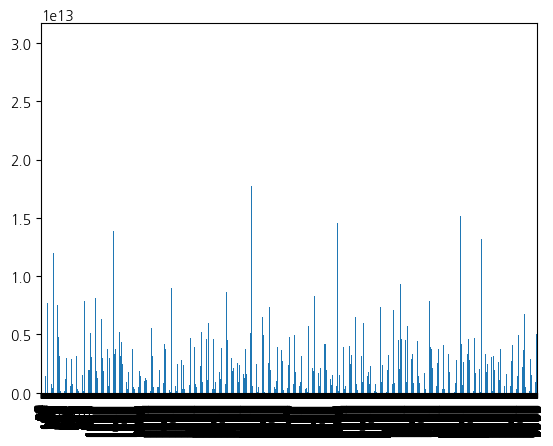

In [194]:
data['time_deltas'].plot.bar()

In [189]:
data['time_deltas'].describe()

count                        10000
mean        0 days 00:54:25.416000
std      0 days 00:56:01.258156194
min                0 days 00:00:00
25%                0 days 00:15:00
50%                0 days 00:37:00
75%                0 days 01:15:00
max                0 days 08:23:00
Name: time_deltas, dtype: object

In [199]:
data['time_deltas2'] = datetime.strptime(data['time_deltas'], '%H:%M:%S')

AttributeError: module 'datetime' has no attribute 'strptime'

In [200]:
data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,time_deltas
0,b919c29d,13,14,14.946163,8,18,16,68.360455,3,4,Low,Basic,4,5,0,0 days 00:08:00
1,a0a60abb,16,18,18.453224,72,16,13,97.567322,2,3,Medium,Basic,1,6,1,0 days 01:12:00
2,b9f171ae,22,1,16.195228,21,13,14,94.358763,3,4,Medium,Premium,0,7,1,0 days 00:21:00
3,5dc0ba8b,1,19,17.628656,42,19,18,70.153228,0,3,Low,Basic,1,0,1,0 days 00:42:00
4,65c83654,4,5,21.390656,30,19,10,81.917908,2,4,Medium,Basic,3,0,1,0 days 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84,18,16,64.966803,2,5,Low,Premium,1,1,1,0 days 01:24:00
9996,24588752,10,11,19.374054,45,9,8,82.750244,3,3,Medium,Basic,2,7,1,0 days 00:45:00
9997,e4622a54,7,27,18.240978,127,24,14,81.567839,3,5,High,Basic,1,6,1,0 days 02:07:00
9998,e07fbad9,11,7,18.783800,5,10,10,89.885656,4,5,Low,Basic,2,0,1,0 days 00:05:00


In [202]:
#분 범주 만들기
bins = [0, 60, 120, 180, 240, 300, 360, 420, 480, 540]
#구분한 범주의 라벨 labels
labels=['1시간', '2시간', '3시간', '4시간', '5시간', '6시간', '7시간', '8시간', '9시간']

# 4. 진도율에 따라 주차별로 변경하기
# 범주화 하기 pd.cut
cuts = pd.cut(data['average_time_per_learning_session'], bins, right=True, include_lowest=True, labels=labels)
cuts

0       1시간
1       2시간
2       1시간
3       1시간
4       1시간
       ... 
9995    2시간
9996    1시간
9997    3시간
9998    1시간
9999    1시간
Name: average_time_per_learning_session, Length: 10000, dtype: category
Categories (9, object): ['1시간' < '2시간' < '3시간' < '4시간' ... '6시간' < '7시간' < '8시간' < '9시간']

In [203]:
cuts = pd.DataFrame(cuts)
cuts

,average_time_per_learning_session
0,1시간
1,2시간
2,1시간
3,1시간
4,1시간
...,...
9995,2시간
9996,1시간
9997,3시간
9998,1시간


In [205]:
data['cuts'] = cuts
data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,time_deltas,cuts
0,b919c29d,13,14,14.946163,8,18,16,68.360455,3,4,Low,Basic,4,5,0,0 days 00:08:00,1시간
1,a0a60abb,16,18,18.453224,72,16,13,97.567322,2,3,Medium,Basic,1,6,1,0 days 01:12:00,2시간
2,b9f171ae,22,1,16.195228,21,13,14,94.358763,3,4,Medium,Premium,0,7,1,0 days 00:21:00,1시간
3,5dc0ba8b,1,19,17.628656,42,19,18,70.153228,0,3,Low,Basic,1,0,1,0 days 00:42:00,1시간
4,65c83654,4,5,21.390656,30,19,10,81.917908,2,4,Medium,Basic,3,0,1,0 days 00:30:00,1시간
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84,18,16,64.966803,2,5,Low,Premium,1,1,1,0 days 01:24:00,2시간
9996,24588752,10,11,19.374054,45,9,8,82.750244,3,3,Medium,Basic,2,7,1,0 days 00:45:00,1시간
9997,e4622a54,7,27,18.240978,127,24,14,81.567839,3,5,High,Basic,1,6,1,0 days 02:07:00,3시간
9998,e07fbad9,11,7,18.783800,5,10,10,89.885656,4,5,Low,Basic,2,0,1,0 days 00:05:00,1시간


In [211]:
index = data['payment_pattern'].iloc[7,:]
index

IndexingError: Too many indexers

In [216]:
#피벗테이블 만들기
data_pivot_table = pd.pivot_table(data, values='user_id',   #values : 열에 들어 가는 부분
                       index=['payment_pattern'], #index : 행에 들어가는 부분
                       columns=['cuts'],  
                       aggfunc="count")  #aggfunc : 데이터 축약시 사용할 함수
data_pivot_table

cuts,1시간,2시간,3시간,4시간,5시간,6시간,7시간,8시간,9시간
payment_pattern,,,,,,,,,
0,874,271,94,23,10,1,1,1,0
1,842,284,95,43,10,5,5,1,0
2,809,280,74,35,5,2,0,1,0
3,834,253,89,33,15,5,1,0,0
4,799,262,96,39,9,6,2,0,1
5,836,269,92,22,10,4,2,3,0
6,864,266,96,32,7,3,0,0,0
7,884,265,83,32,12,4,3,0,1
